In [1]:
import tensorflow as tf
from PIL import Image
import os
import glob
from matplotlib import pyplot as plt


In [2]:
def directory_should_exist(*args):
    dir = os.path.join(*args)
    if not os.path.isdir(dir):
        raise Exception("Path '{}' is not a directory.".format(dir))
    return dir

In [3]:
def ensure_directory(*args):
    dir = os.path.join(*args)
    try:
        os.makedirs(dir)
    except OSError as err:
        if err.errno != 17:
            raise err
    return dir

In [4]:
project_dir = directory_should_exist("_projects/madina")
dataset_dir = directory_should_exist(project_dir, "input/faces_combined/train")
output_dir = ensure_directory(project_dir, "output/v004")
model_dir = output_dir
model_file = directory_should_exist(model_dir, 'generator')
output_image_dir = ensure_directory(output_dir, "images_test")
glob_pattern = '*.jpg'

In [38]:
sample_image_filename = glob.glob(os.path.join(dataset_dir, glob_pattern))[5]
print(sample_image_filename)
sample_image = tf.io.read_file(sample_image_filename)
sample_image = tf.io.decode_jpeg(sample_image)
print(sample_image.shape)

_projects/madina/input/faces_combined/train/07192.jpg
(512, 1024, 3)


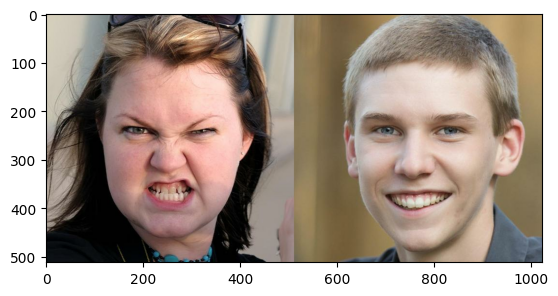

In [39]:
plt.figure()
plt.imshow(sample_image)
plt.show()

In [40]:
generator = tf.saved_model.load(model_file)

In [41]:
sample_mesh = sample_image[:, 512:, :]
sample_mesh = tf.cast(sample_mesh, tf.float32)
sample_mesh = (sample_mesh / 127.5) - 1

In [42]:
tf.reduce_min(sample_mesh).numpy(), tf.reduce_max(sample_mesh).numpy()

(-1.0, 0.94509804)

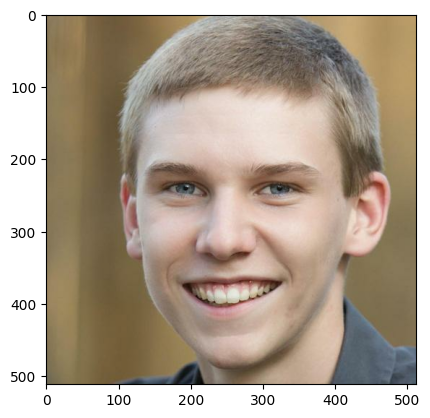

In [43]:
plt.figure()
plt.imshow(sample_mesh * 0.5 + 0.5)
plt.show()

In [44]:
output_image = generator(tf.expand_dims(sample_mesh, 0), training=False)
output_image = tf.squeeze(output_image)

In [45]:
tf.reduce_min(output_image)

<tf.Tensor: shape=(), dtype=float32, numpy=-0.9998821>

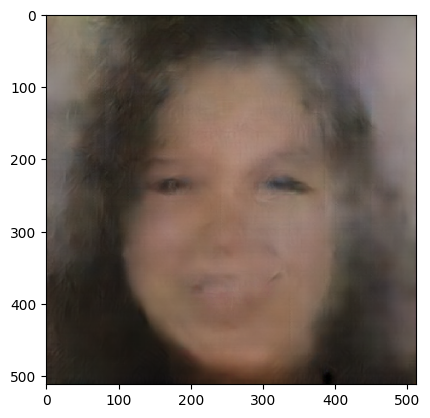

In [46]:
plt.figure()
plt.imshow(output_image * 0.5 + 0.5)
plt.show()

In [77]:
image_fnames = glob.glob(os.path.join(dataset_dir, glob_pattern))
for fname in image_fnames:
    sample_image = tf.io.read_file(fname)
    sample_image = tf.io.decode_jpeg(sample_image)
    sample_mesh = sample_image[:, 512:, :]
    sample_mesh = tf.cast(sample_mesh, tf.float32)
    sample_mesh = (sample_mesh / 127.5) - 1
    output_image = generator(tf.expand_dims(sample_mesh, 0), training=True)
    output_image = tf.squeeze(output_image)
    output_image = tf.image.convert_image_dtype(output_image * 0.5 + 0.5, dtype=tf.uint8)
    output_image = tf.image.encode_jpeg(output_image)
    output_image_fname = os.path.join(output_image_dir, os.path.basename(fname))
    tf.io.write_file(output_image_fname, output_image)
    print('.', end='', flush=True)

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

KeyboardInterrupt: 